In [ ]:
# This displays a simple directory tree in the terminal.

import seedir as sd

sd.seedir('C:/Users/Email/Desktop/', style='lines', depthlimit=2)


Desktop/
├─2504_Aging_news/
│ └─2504_Aging_news/
├─32f74534-4815-4f2f-a5d1-14d4b3e41a5e.png
├─46699566-3030-498a-b746-ebef71024ec7.png
├─Avast Secure Browser.lnk
├─AVX2MP4_DE.exe - Shortcut.lnk
├─BackupXiomi20240727/
│ ├─-5240424232645682507_121.jpg
│ ├─-5242665552739166430_121.jpg
│ ├─-5244926333329466026_121.jpg
│ ├─-5246962822137635615_109.jpg
│ ├─-5247154042671585757_120.jpg
│ ├─-5247178133143149438_121.jpg
│ ├─-5249319895894711099_121.jpg
│ ├─-5249319895894711100_121.jpg
│ ├─-5249319895894711101_121.jpg
│ ├─-5251609306737010395_121.jpg
│ ├─-5251754983437755164_120.jpg
│ ├─-5251754983437755165_120.jpg
│ ├─-5251754983437755166_120.jpg
│ ├─-5251754983437755167_120.jpg
│ ├─-5254006783251437569_120.jpg
│ ├─-5254011481945659468_121.jpg
│ ├─-5255960512334782408_120.jpg
│ ├─-5255960512334782409_120.jpg
│ ├─-5255960512334782410_120.jpg
│ ├─-5255960512334782411_120.jpg
│ ├─-5258160179835427739_120.jpg
│ ├─-5258323835269275329_121.jpg
│ ├─-5260530048300081502_120.jpg
│ ├─-5260530048300081503

In [ ]:
# This also displays a directory tree, but as a string representation.

from directory_tree import DisplayTree

tree_str = DisplayTree('C:/Users/Email/Desktop/CAM/', stringRep=True, showHidden=True)
print(tree_str)


CAM/
├── .python-version
├── .venv/
│   ├── Include/
│   ├── Lib/
│   │   └── site-packages/
│   │       ├── _distutils_hack/
│   │       │   ├── __init__.py
│   │       │   ├── __pycache__/
│   │       │   │   ├── __init__.cpython-311.pyc
│   │       │   │   └── override.cpython-311.pyc
│   │       │   └── override.py
│   │       ├── certifi/
│   │       │   ├── __init__.py
│   │       │   ├── __main__.py
│   │       │   ├── __pycache__/
│   │       │   │   ├── __init__.cpython-311.pyc
│   │       │   │   ├── __main__.cpython-311.pyc
│   │       │   │   └── core.cpython-311.pyc
│   │       │   ├── cacert.pem
│   │       │   ├── core.py
│   │       │   └── py.typed
│   │       ├── certifi-2025.4.26.dist-info/
│   │       │   ├── INSTALLER
│   │       │   ├── licenses/
│   │       │   │   └── LICENSE
│   │       │   ├── METADATA
│   │       │   ├── RECORD
│   │       │   ├── top_level.txt
│   │       │   └── WHEEL
│   │       ├── charset_normalizer/
│   │       │   ├── __init__.py
│   │

In [ ]:
# This script shows a directory tree using the pyvis library, which can be viewed in a web browser.
# It is like Brocoli, but with a more interactive visualization.


import os
from pyvis.network import Network

def build_network(net, path, parent=None):
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        net.add_node(item_path, label=item)
        if parent:
            net.add_edge(parent, item_path)
        if os.path.isdir(item_path):
            build_network(net, item_path, item_path)

net = Network(height='750px', width='100%', directed=True)
root_path = 'C:/Users/Email/Desktop/CAM'
net.add_node(root_path, label=os.path.basename(root_path))
build_network(net, root_path, root_path)

net.show('directory_tree.html')



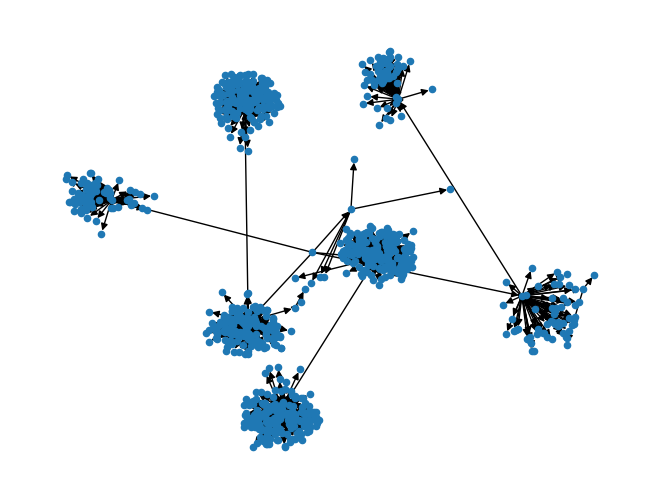

In [ ]:
#This script uses NetworkX to create a directed graph of the directory structure and displays it using Matplotlib.
# Also like Brocoli, but with a different visualization approach.
import os
import networkx as nx
import matplotlib.pyplot as plt

def build_graph(G, path, parent=None):
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        G.add_node(item_path)
        if parent:
            G.add_edge(parent, item_path)
        if os.path.isdir(item_path):
            build_graph(G, item_path, item_path)

G = nx.DiGraph()
root_path = 'C:/Users/Email/Desktop/CAM'
G.add_node(root_path)
build_graph(G, root_path, root_path)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=20)
plt.show()


In [ ]:
# This scripts create the Brocoli-like visualization of a directory tree using the pyvis library.
# But with the size of each file represented as the node size, and the directory structure shown as a directed graph.
from pyvis.network import Network
import os

net = Network(height='750px', width='100%', directed=True)

def add_file_node(path, parent=None):
    size = os.path.getsize(path)
    label = os.path.basename(path)
    net.add_node(path, label=label, value=size)
    if parent:
        net.add_edge(parent, path)

def traverse_directory(directory, parent=None):
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isfile(item_path):
            add_file_node(item_path, parent)
        elif os.path.isdir(item_path):
            net.add_node(item_path, label=item)
            if parent:
                net.add_edge(parent, item_path)
            traverse_directory(item_path, item_path)

root_dir = 'C:/Users/Email/Desktop/CAM'
net.add_node(root_dir, label=os.path.basename(root_dir))
traverse_directory(root_dir, root_dir)

net.show_buttons()
net.show('directory_tree.html')


🔍 Detecting Duplicate Files
To identify duplicate files, you can use Python scripts that compute hashes of file contents. Here's a basic example

In [ ]:
import os
import hashlib
from collections import defaultdict
from tqdm import tqdm
from pyvis.network import Network

# Initialize pyvis network
net = Network(height='750px', width='100%', directed=True)

# Function to find duplicates with progress bar
def find_duplicates(directory):
    hashes = defaultdict(list)
    file_paths = []

    # Collect all file paths
    for dirpath, _, filenames in os.walk(directory):
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            file_paths.append(filepath)

    # Compute hashes with progress bar
    for filepath in tqdm(file_paths, desc="Scanning files", unit="file"):
        try:
            with open(filepath, 'rb') as f:
                filehash = hashlib.md5(f.read()).hexdigest()
            hashes[filehash].append(filepath)
        except Exception as e:
            print(f"Error reading {filepath}: {e}")

    return {hash: paths for hash, paths in hashes.items() if len(paths) > 1}

# Set directory and find duplicates
directory = 'C:/Users/Email/Desktop/CAM'
duplicates = find_duplicates(directory)

# Visualize duplicates
duplicate_color = 'red'
for filehash, files in duplicates.items():
    for file in files:
        net.add_node(file, label=os.path.basename(file), color=duplicate_color)
    for i in range(len(files)):
        for j in range(i + 1, len(files)):
            net.add_edge(files[i], files[j], color='orange')

# Show the network
net.show('duplicate_files.html')



Scanning files:  65%|██████▌   | 1585/2429 [00:22<00:08, 101.54file/s]